In [3]:
import mysql.connector
import re
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "root",
    database = "CSCI_620_GA4"
    )

mycursor = db.cursor()

In [4]:
file_path = 'marvelsStar.csv'
df = pd.read_csv(file_path)

In [5]:
df['SP1'] = df['SP1'].replace("??", pd.NA) 
df['SP1'] = df['SP1'].replace("-9999", pd.NA) 
df['SP2'] = df['SP2'].replace("??", pd.NA) 
df['SP2'] = df['SP2'].replace("-9999", pd.NA) 
df['SP1'] = df['SP1'].fillna(df['SP1'].mode()[0])
df['SP2'] = df['SP2'].fillna(df['SP2'].mode()[0])


In [8]:
categorical_columns = ['STARNAME', 'TWOMASS_NAME', 'Plate', 'GSC_Name', 'TYC_Name', 'HIP_Name', 'SP1', 'SP2', 'RPM_LOG_g', 'HIP_SPTYPE']
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [53]:
create_table_query = f"CREATE TABLE IF NOT EXISTS marvelsStar ("
count = 0
column_names = ""
for i in range(0, 6):
    if count > 0:
        create_table_query += ", "
        column_names += ", "
    else:
        count += 1
    create_table_query += "`" + df.columns[i] + "`" + " VARCHAR(100)"
    column_names += "`" + df.columns[i] + "`"
for i in range(6, 13):
    create_table_query += ", `" + df.columns[i] + "`" + " int"
    column_names += ", `" + df.columns[i] + "`"
for i in range(13, 16):
    create_table_query += ", `" + df.columns[i] + "`" + " VARCHAR(100)"
    column_names += ", `" + df.columns[i] + "`"
for i in range(16, len(df.columns) - 1):
    create_table_query += ", `" + df.columns[i] + "`" + " int"
    column_names += ", `" + df.columns[i] + "`"
create_table_query += f", `{df.columns[len(df.columns) - 1]}` VARCHAR(100))"
column_names += ", `" + df.columns[len(df.columns) - 1] + "`"
print(column_names)
mycursor.execute(create_table_query)
db.commit()

`STARNAME`, `TWOMASS_NAME`, `Plate`, `GSC_Name`, `TYC_Name`, `HIP_Name`, `RA_Final`, `DEC_Final`, `GSC_B`, `GSC_V`, `TWOMASS_J`, `TWOMASS_H`, `TWOMASS_K`, `SP1`, `SP2`, `RPM_LOG_g`, `Teff`, `log_g`, `FeH`, `GSC_B_E`, `GSC_V_E`, `TWOMASS_J_E`, `TWOMASS_H_E`, `TWOMASS_K_E`, `Teff_E`, `log_g_E`, `FeH_E`, `Epoch_0`, `RA_0`, `DEC_0`, `RA_TWOMASS`, `DEC_TWOMASS`, `GSC_PM_RA`, `GSC_PM_DEC`, `GSC_PM_RA_E`, `GSC_PM_DEC_E`, `TYC_B`, `TYC_B_E`, `TYC_V`, `TYC_V_E`, `HIP_PLX`, `HIP_PLX_E`, `HIP_SPTYPE`


In [52]:
#mycursor.execute("DROP TABLE marvelsStar")

In [54]:
batch_size = 100;
batch_i = 0
loc = []
 
vallist = []
for k in range(len(df)):
    batch_i = batch_i + 1
    values = df.iloc[k].tolist()
    for i in range(len(df.columns)):
        if i in range(6, 13) or i in range(16, len(df.columns) - 1):
            print(i)
            values[i] = int(values[i])  
    vallist.append(values)
    placeholders = ", ".join(['%s'] * len(values))
    query = (f"INSERT INTO marvelsStar ({column_names}) VALUES ({placeholders})")
    if(batch_i % batch_size == 0):
        mycursor.executemany(query, vallist)
        db.commit()
        vallist = []

6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
6
7
8
9
10
11
12
16
17
18
19
20
21
22
23
24
25
26


In [65]:
columns_to_select = "`RA_Final`, `DEC_Final`, `Teff`, `FeH`, `log_g`"
sql_query = f"SELECT {columns_to_select} FROM marvelsStar"
print(sql_query)
mycursor.execute(sql_query)
result = mycursor.fetchall()
db.commit()
df_marvel = pd.DataFrame(result, columns=columns_to_select.split(", "))
df_marvel

SELECT `RA_Final`, `DEC_Final`, `Teff`, `FeH`, `log_g` FROM marvelsStar


`RA_Final`  `DEC_Final`  `Teff`  `FeH`  `log_g`
0              84            5    5624      0        4
1              84            5    5624      0        4
2              84            4    5666      0        3
3              84            4    5666      0        3
4              85            5    5157      0        4
...           ...          ...     ...    ...      ...
10995         176            1    5121      0        4
10996         176            1    6087      0        4
10997         176            1    6087      0        4
10998         176            1    5715      0        4
10999         176            1    5715      0        4

[11000 rows x 5 columns]

In [68]:
Q1 = df_marvel["`log_g`"].quantile(0.25)
Q3 = df_marvel["`log_g`"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_marvel = df_marvel[(df_marvel["`log_g`"] >= lower_bound) & (df_marvel["`log_g`"] <= upper_bound)]

c:\Users\dharm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dharm\AppData\Local\Temp\ipykernel_20972\3028185389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marvel['Cluster'] = kmeans.fit_predict(df_marvel[['`RA_Final`', '`DEC_Final`']])


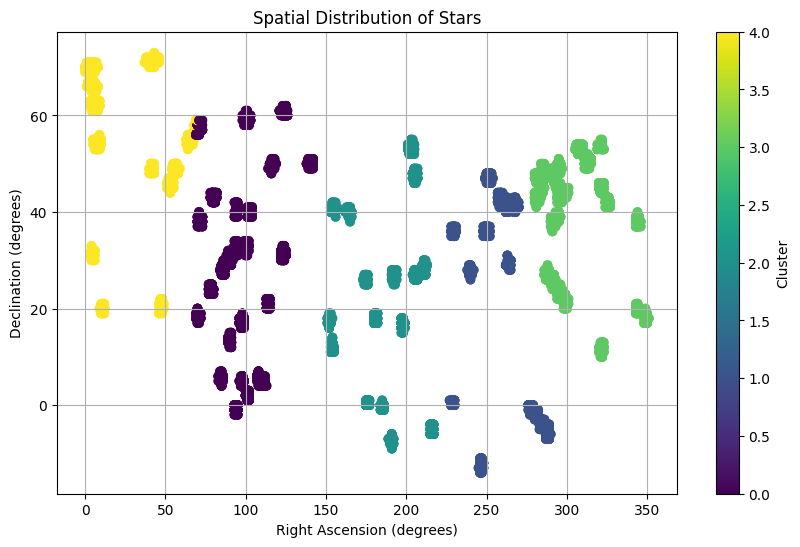

In [76]:
k = 5  
kmeans = KMeans(n_clusters=k)

df_marvel['Cluster'] = kmeans.fit_predict(df_marvel[['`RA_Final`', '`DEC_Final`']])

plt.figure(figsize=(10, 6))
plt.scatter(df_marvel['`RA_Final`'], df_marvel['`DEC_Final`'], c=df_marvel['Cluster'], cmap='viridis', marker='o')
plt.title('Spatial Distribution of Stars')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

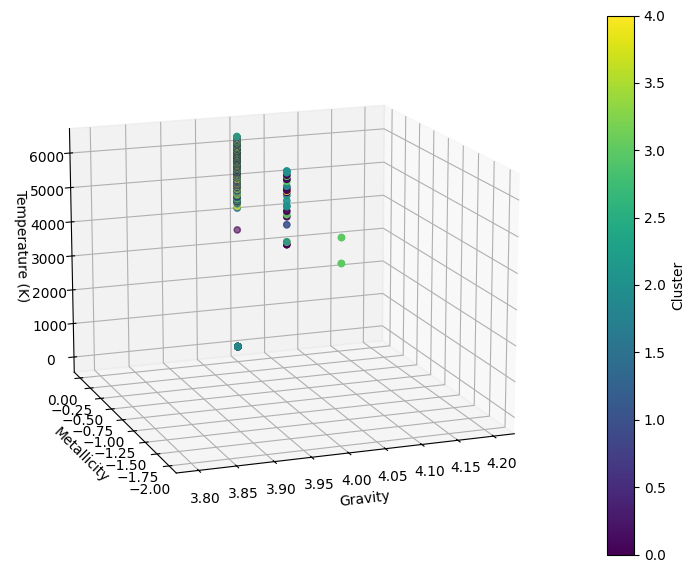

In [94]:
log_g = df_marvel['`log_g`']
feh = df_marvel['`FeH`']
teff = df_marvel['`Teff`']


fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(log_g, feh, teff, c=df_marvel["Cluster"], cmap='viridis', marker='o')

ax.set_xlabel('Gravity')
ax.set_ylabel('Metallicity')
ax.set_zlabel('Temperature (K)')
ax.view_init(elev=15, azim=250) 

cbar = plt.colorbar(sc)
cbar.set_label('Cluster')

plt.show()

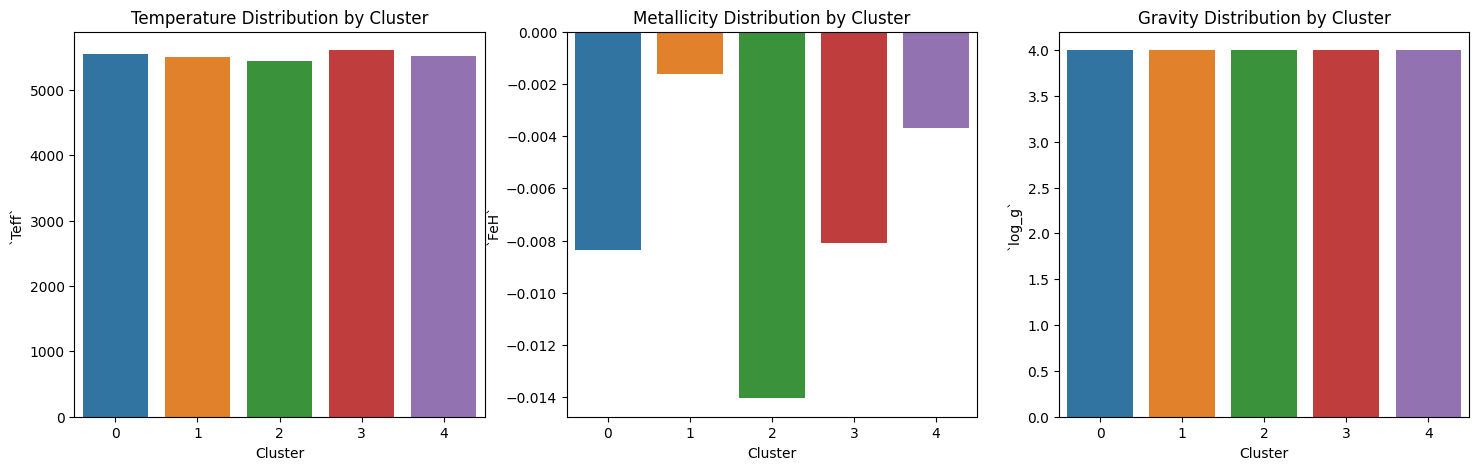

In [96]:
cluster_properties = df_marvel.groupby('Cluster')[['`Teff`', '`FeH`', '`log_g`']].mean()

# Plotting cluster properties
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=cluster_properties.index, y='`Teff`', data=cluster_properties, ax=axes[0])
axes[0].set_title('Temperature Distribution by Cluster')
sns.barplot(x=cluster_properties.index, y='`FeH`', data=cluster_properties, ax=axes[1])
axes[1].set_title('Metallicity Distribution by Cluster')
sns.barplot(x=cluster_properties.index, y='`log_g`', data=cluster_properties, ax=axes[2])
axes[2].set_title('Gravity Distribution by Cluster')
plt.show()

In [125]:
columns_to_select_3 = "`HIP_SPTYPE`, `RA_Final`, `DEC_Final`, `GSC_B`, `GSC_V`, `TWOMASS_J`, `TWOMASS_H`, `TWOMASS_K`, `Teff`, `log_g`, `FeH`"
sql_query = f"SELECT {columns_to_select_3} FROM marvelsStar where `HIP_SPTYPE` NOT IN ('-9999')"
mycursor.execute(sql_query)
result = mycursor.fetchall()
db.commit()
df_marvel_3 = pd.DataFrame(result, columns=columns_to_select_3.split(", "))

`HIP_SPTYPE`  `RA_Final`  `DEC_Final`  `GSC_B`  `GSC_V`  `TWOMASS_J`  \
0      NO_HIP_TYPE!          84            5       12       11           10   
1      NO_HIP_TYPE!          84            5       12       11           10   
2      NO_HIP_TYPE!          84            4       12       11           10   
3      NO_HIP_TYPE!          84            4       12       11           10   
4      NO_HIP_TYPE!          85            5       13       11           10   
...             ...         ...          ...      ...      ...          ...   
10993  NO_HIP_TYPE!         176            1       12       11           10   
10994  NO_HIP_TYPE!         176            1        9        9            8   
10995  NO_HIP_TYPE!         176            1        9        9            8   
10996  NO_HIP_TYPE!         176            1       11       10            9   
10997  NO_HIP_TYPE!         176            1       11       10            9   

       `TWOMASS_H`  `TWOMASS_K`  `Teff`  `log_g`  `FeH`  
0               10           10    5624        4      0  
1               10           10    5624        4      0  
2                9            9    5666        3      0  
3                9            9    5666        3      0  
4                9            9    5157        4      0  
...            ...          ...     ...      ...    ...  
10993           10           10    5121        4      0  
10994            8            8    6087        4      0  
10995            8            8    6087        4      0  
10996            9            9    5715        4      0  
10997            9            9    5715        4      0  

[10998 rows x 11 columns]

In [126]:
print(df_marvel_3["`HIP_SPTYPE`"].unique())

['NO_HIP_TYPE!' 'G0' 'K0' 'K' 'G2V' 'G1V' 'G0IV' 'F8V' 'K1III' 'K2' 'K5'
 'G5' 'K4V' 'G8V' 'F8' 'F7Vws' 'G' 'M0' 'G2III' 'K7V' 'M1V:' 'K0III'
 'K1III-IV' 'K3Ib' 'G2Vws' 'G5+...' 'K8' 'K1IV' 'K3' 'K3V' 'M0p' 'G7III'
 'K4' 'G1IV' 'Gp' 'K1V' 'F6' 'G6V' 'G8III' 'K0V' 'K2III' 'G6III']


In [128]:
X = df_marvel_3[['`RA_Final`', '`DEC_Final`', '`GSC_B`', '`GSC_V`', '`TWOMASS_J`', '`TWOMASS_H`', '`TWOMASS_K`', '`Teff`', '`log_g`', '`FeH`']]
Y = df_marvel_3['`HIP_SPTYPE`']

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [130]:
clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [131]:

Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))


              precision    recall  f1-score   support

          F6       1.00      1.00      1.00         1
       F7Vws       1.00      1.00      1.00         1
          F8       1.00      1.00      1.00         7
          G0       1.00      0.84      0.91        25
        G0IV       1.00      1.00      1.00         2
         G1V       0.33      1.00      0.50         1
          G5       0.91      0.83      0.87        24
           K       1.00      1.00      1.00         1
          K0       0.87      0.87      0.87        15
       K0III       1.00      1.00      1.00         2
         K0V       1.00      1.00      1.00         1
       K1III       1.00      0.33      0.50         3
    K1III-IV       0.33      1.00      0.50         1
        K1IV       1.00      1.00      1.00         1
          K2       0.47      0.78      0.58         9
          K3       1.00      1.00      1.00         1
          K5       0.33      0.60      0.43         5
          K8       1.00    

c:\Users\dharm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dharm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dharm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


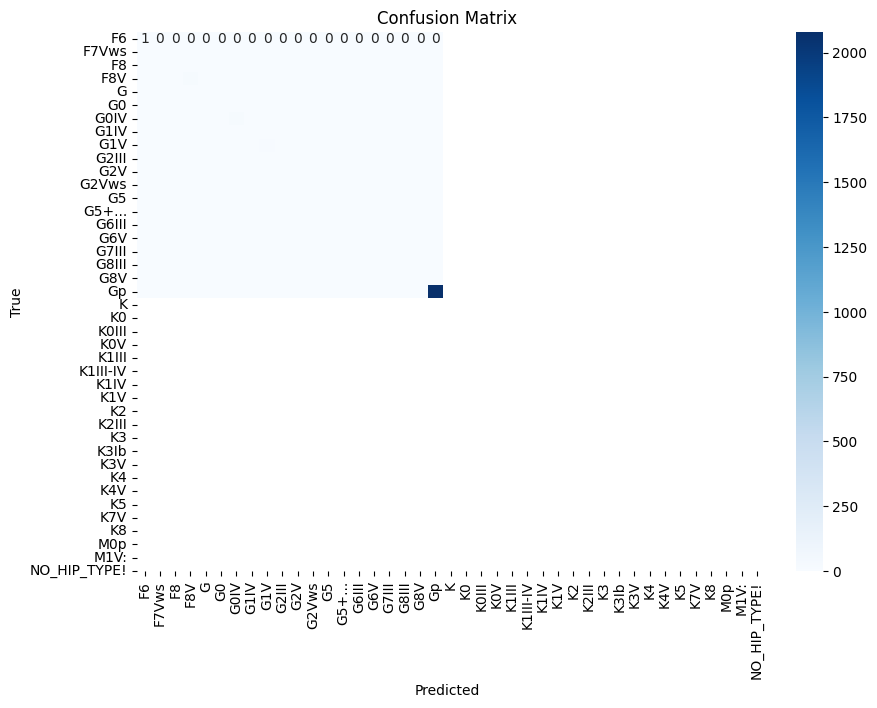

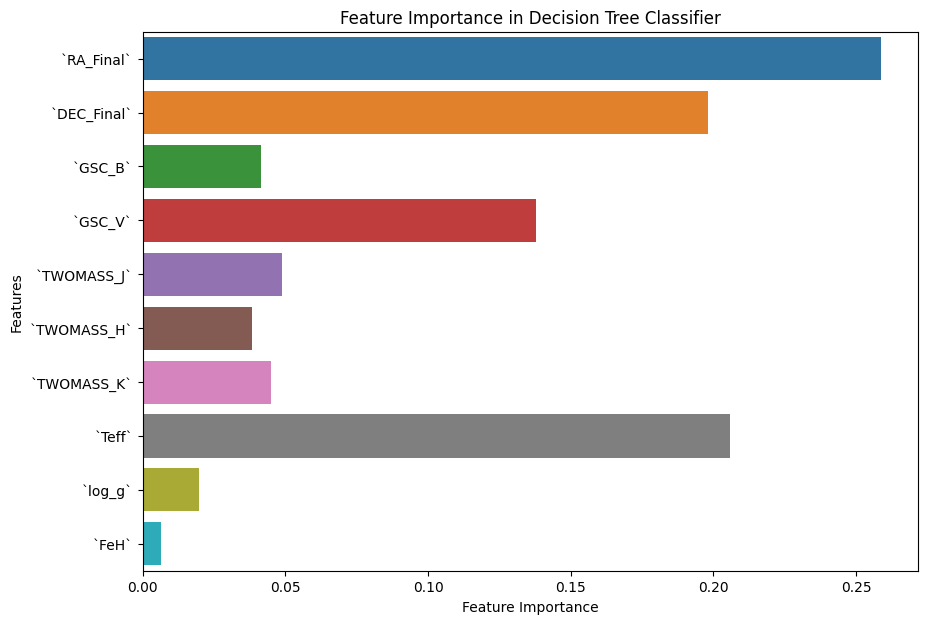

In [132]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

feature_importance = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()

In [133]:
mycursor.close()
db.close()